In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

### **Objetivo: Analisar quais características da escola e da gestão escolar impacta na nota média de portugues do 5º ano na prova do SAEB da região Nordeste**

# **Primeiro: REDUÇÃO DE DADOS**
    Selecionar apenas os dados referentes ao objetivo da análise, ou seja, apenas os dados da escola (localização, região, nome da escola, quantidade de salas, etc.), gestão escolar e a nota média de português do 5º ano.

In [ ]:
escolas = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2019,1,11,1100015,2,11024666,3,2,100.0,64.4,...,184.83,210.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,11,1100015,2,11024682,2,1,100.0,80.4,...,223.45,245.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,11,1100015,2,11024828,3,1,100.0,48.9,...,158.06,194.74,239.76,244.94,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,11,1100015,2,11024968,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,306.34,313.39,NaN,NaN,306.34,313.39
4,2019,1,11,1100015,2,11025077,3,1,100.0,29.5,...,173.45,180.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
escolas.shape

(70606, 137)

In [ ]:
escolas.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'PC_FORMACAO_DOCENTE_FINAL',
       ...
       'MEDIA_5EF_LP', 'MEDIA_5EF_MT', 'MEDIA_9EF_LP', 'MEDIA_9EF_MT',
       'MEDIA_EMT_LP', 'MEDIA_EMT_MT', 'MEDIA_EMI_LP', 'MEDIA_EMI_MT',
       'MEDIA_EM_LP', 'MEDIA_EM_MT'],
      dtype='object', length=137)

In [ ]:
# Seleciona apenas os dados da região Nordeste
escolas = escolas[escolas["ID_REGIAO"] == 2]

# Identificando todos os atributos da escola e das notas de portugues do 5º ano
#escolas = escolas.loc[:, ["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA",
#                          "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO", "PC_FORMACAO_DOCENTE_INICIAL", 
#                          "NIVEL_SOCIO_ECONOMICO", "NU_MATRICULADOS_CENSO_5EF", "NU_PRESENTES_5EF",
#                          "TAXA_PARTICIPACAO_5EF", "NIVEL_0_LP5", "NIVEL_1_LP5", "NIVEL_2_LP5",
#                          "NIVEL_3_LP5", "NIVEL_4_LP5", "NIVEL_5_LP5", "NIVEL_6_LP5", "NIVEL_7_LP5",
#                          "NIVEL_8_LP5", "NIVEL_9_LP5", "MEDIA_5EF_LP"]]


# Selecionando apenas os atributos necessários
# Atributos de IDs, Datas, UF, Area são descatados
escolas = escolas.loc[:, ["ID_ESCOLA", "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO", "PC_FORMACAO_DOCENTE_INICIAL", 
                          "NIVEL_SOCIO_ECONOMICO", "MEDIA_5EF_LP"]]


escolas.head()

,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,NIVEL_SOCIO_ECONOMICO,MEDIA_5EF_LP
7944,21088179,2,1,NaN,Nível III,NaN
7945,21088357,3,1,92.5,Nível IV,216.02
7946,21088462,3,1,62.0,Nível III,210.52
7947,21088519,3,1,37.8,Nível III,195.74
7948,21088527,3,2,NaN,Nível III,NaN


In [ ]:
escolas.shape

(24838, 6)

In [ ]:
escolas.columns

Index(['ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO', 'MEDIA_5EF_LP'],
      dtype='object')

In [ ]:
escolas.dtypes

ID_ESCOLA                        int64
ID_DEPENDENCIA_ADM               int64
ID_LOCALIZACAO                   int64
PC_FORMACAO_DOCENTE_INICIAL    float64
NIVEL_SOCIO_ECONOMICO           object
MEDIA_5EF_LP                   float64
dtype: object

In [ ]:
escolas.isnull().sum().sort_values(ascending=False)

MEDIA_5EF_LP                   10207
PC_FORMACAO_DOCENTE_INICIAL     8050
NIVEL_SOCIO_ECONOMICO            744
ID_ESCOLA                          0
ID_DEPENDENCIA_ADM                 0
ID_LOCALIZACAO                     0
dtype: int64

# **Segundo: INTEGRAÇÃO**

In [ ]:
diretores = pd.read_csv("TS_DIRETOR.csv")
diretores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q244,TX_RESP_Q245,TX_RESP_Q246,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,B,B,B,A,B,B,D,D
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C


In [ ]:
diretores.shape

(74176, 262)

In [ ]:
diretores.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001',
       ...
       'TX_RESP_Q244', 'TX_RESP_Q245', 'TX_RESP_Q246', 'TX_RESP_Q247',
       'TX_RESP_Q248', 'TX_RESP_Q249', 'TX_RESP_Q250', 'TX_RESP_Q251',
       'TX_RESP_Q252', 'TX_RESP_Q253'],
      dtype='object', length=262)

In [ ]:
m = pd.merge(diretores, escolas, how = 'inner', on = ["ID_ESCOLA", "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO"])
m.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253,PC_FORMACAO_DOCENTE_INICIAL,NIVEL_SOCIO_ECONOMICO,MEDIA_5EF_LP
0,2019,2,21,2100055,2,21088179,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,D,D,NaN,Nível III,NaN
1,2019,2,21,2100055,2,21088357,3,1,1,D,...,B,B,B,B,B,E,E,92.5,Nível IV,216.02
2,2019,2,21,2100055,2,21088462,3,1,1,A,...,NaN,NaN,NaN,NaN,NaN,D,D,62.0,Nível III,210.52
3,2019,2,21,2100055,2,21088519,3,1,1,A,...,B,A,A,B,B,C,D,37.8,Nível III,195.74
4,2019,2,21,2100055,2,21088527,3,2,1,C,...,B,B,B,B,B,D,D,NaN,Nível III,NaN


In [ ]:
m.drop(["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA", "TX_RESP_Q252"], axis=1, inplace=True)

In [ ]:
m["ID_LOCALIZACAO"] = m["ID_LOCALIZACAO"].replace([1, 2], ["Urbana", "Rural"])
m["ID_DEPENDENCIA_ADM"] = m["ID_DEPENDENCIA_ADM"].replace([1, 2, 3, 4], ["Federal", "Estadual", "Municipal", "Privada"])



In [ ]:
m.shape

(25089, 258)

In [ ]:
m.columns

Index(['ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001', 'TX_RESP_Q002', 'TX_RESP_Q003', 'TX_RESP_Q004',
       'TX_RESP_Q005', 'TX_RESP_Q006', 'TX_RESP_Q007',
       ...
       'TX_RESP_Q246', 'TX_RESP_Q247', 'TX_RESP_Q248', 'TX_RESP_Q249',
       'TX_RESP_Q250', 'TX_RESP_Q251', 'TX_RESP_Q253',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO', 'MEDIA_5EF_LP'],
      dtype='object', length=258)

In [ ]:
m.dtypes

ID_DEPENDENCIA_ADM                object
ID_LOCALIZACAO                    object
IN_PREENCHIMENTO_QUESTIONARIO      int64
TX_RESP_Q001                      object
TX_RESP_Q002                     float64
                                  ...   
TX_RESP_Q251                      object
TX_RESP_Q253                      object
PC_FORMACAO_DOCENTE_INICIAL      float64
NIVEL_SOCIO_ECONOMICO             object
MEDIA_5EF_LP                     float64
Length: 258, dtype: object

In [ ]:
# Quantidade de valores ausentes em cada variável
m.isnull().sum().sort_values(ascending=False)[0:20]

TX_RESP_Q171    21792
TX_RESP_Q174    21792
TX_RESP_Q172    21792
TX_RESP_Q170    21792
TX_RESP_Q169    21792
TX_RESP_Q168    21792
TX_RESP_Q167    21792
TX_RESP_Q173    21792
TX_RESP_Q067    20992
TX_RESP_Q065    20920
TX_RESP_Q064    20920
TX_RESP_Q063    20920
TX_RESP_Q062    20920
TX_RESP_Q061    20920
TX_RESP_Q058    20920
TX_RESP_Q060    20920
TX_RESP_Q066    20920
TX_RESP_Q059    20920
TX_RESP_Q076    20861
TX_RESP_Q077    20860
dtype: int64

In [ ]:
# Porcentagem de valores ausentes em cada variável
(m.isnull().sum().sort_values(ascending=False)[0:20] / m.shape[0]) * 100

TX_RESP_Q171    86.858783
TX_RESP_Q174    86.858783
TX_RESP_Q172    86.858783
TX_RESP_Q170    86.858783
TX_RESP_Q169    86.858783
TX_RESP_Q168    86.858783
TX_RESP_Q167    86.858783
TX_RESP_Q173    86.858783
TX_RESP_Q067    83.670134
TX_RESP_Q065    83.383156
TX_RESP_Q064    83.383156
TX_RESP_Q063    83.383156
TX_RESP_Q062    83.383156
TX_RESP_Q061    83.383156
TX_RESP_Q058    83.383156
TX_RESP_Q060    83.383156
TX_RESP_Q066    83.383156
TX_RESP_Q059    83.383156
TX_RESP_Q076    83.147993
TX_RESP_Q077    83.144007
dtype: float64

In [ ]:
m["TX_RESP_Q171"].value_counts()

B    3281
A      16
Name: TX_RESP_Q171, dtype: int64

# **Terceiro: LIMPEZA DE DADOS**

In [ ]:
def Limpeza(variavelAlvo, dataset):
    df = dataset.copy()

    # 1 - Remove todas as LINHAS que possui valores ausentes na coluna ALVO
    if (variavelAlvo != None):
        df.dropna(subset=[variavelAlvo], inplace=True)

    # 2 - Remove todas as COLUNAS que possui 30% ou mais de valores ausentes
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if df[index].isnull().sum() >= ((df.shape[0] * 30) / 100):
            df.drop([index], axis=1, inplace=True)

    # 2 - Remove todas as COLUNAS que possui 30% ou mais de valores ausentes
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if df[index].isnull().sum() >= ((df.shape[0] * 30) / 100):
            df.drop([index], axis=1, inplace=True)

    # 3 - Remove todas as LINHAS que possuem brancos, nulos e e símbolos especiais
    df.replace(".", np.nan)
    df.replace("*", np.nan)
    df.dropna(inplace=True)

    # 4 - Remove dados duplicados
    df.drop_duplicates(inplace=True)

    # 5 - Remove todas as COLUNAS que possuem apenas um rótulo
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if len(df[index].unique().tolist()) == 1:
            df.drop([index], axis=1, inplace=True)
    
   

    #print(df.shape, "\n")

    #print(df.isnull().sum().sort_values(ascending=False))

    return df

In [ ]:
m = Limpeza("MEDIA_5EF_LP", m)

In [ ]:
m.shape

(3332, 191)

In [ ]:
# Porcentagem de valores ausentes em cada variável
(m.isnull().sum().sort_values(ascending=False)[0:20] / m.shape[0]) * 100

ID_DEPENDENCIA_ADM    0.0
TX_RESP_Q178          0.0
TX_RESP_Q161          0.0
TX_RESP_Q162          0.0
TX_RESP_Q163          0.0
TX_RESP_Q164          0.0
TX_RESP_Q165          0.0
TX_RESP_Q166          0.0
TX_RESP_Q175          0.0
TX_RESP_Q176          0.0
TX_RESP_Q177          0.0
TX_RESP_Q179          0.0
TX_RESP_Q159          0.0
TX_RESP_Q180          0.0
TX_RESP_Q181          0.0
TX_RESP_Q182          0.0
TX_RESP_Q183          0.0
TX_RESP_Q184          0.0
TX_RESP_Q185          0.0
TX_RESP_Q186          0.0
dtype: float64

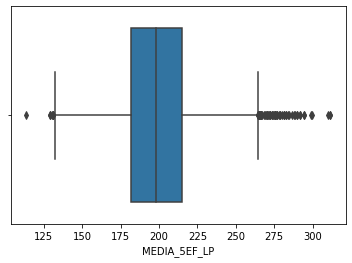

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
sns.boxplot(x=m["MEDIA_5EF_LP"])
plt.show()

* Os outliers não serão removidos, pois é possível escolas apresentarem notas superiores a outras

In [ ]:
m["ID_DEPENDENCIA_ADM"].value_counts()

Municipal    3148
Estadual      184
Name: ID_DEPENDENCIA_ADM, dtype: int64

# **Quarto: REDUÇÃO DE DADOS**

In [ ]:
# Dividindo os dados em treino e teste
def dividirDataset(dataset):
    dataset_train, dataset_test = train_test_split(dataset, test_size=0.30, random_state=12)

    return dataset_train, dataset_test

# **Quinto: Transformação de Dados**

#### **Codificação de Variáveis Categóricas**

In [ ]:
# Transforma variáveis categóricas
def codificar(dataset_train, dataset_test, classe):
    categorico_ordinal = OrdinalEncoder()
    categorico_nominal = OneHotEncoder(handle_unknown='ignore')
    scaler = LabelEncoder()
 
    if dataset_train[classe].dtype == object:
        target_train = dataset_train[classe]
        target_test = dataset_test[classe]

        dataset_train.drop([classe], axis=1, inplace=True)
        dataset_test.drop([classe], axis=1, inplace=True)

        columns = dataset_train.select_dtypes(include=['object']).columns.tolist()

        for index in columns:
            # Transforma variáveis categóricas NOMINAL
            if len(dataset_train[index].unique().tolist()) == 2:
                dataset_train[index] = dataset_train[index].replace(["A", "B"], [1, 0])
                dataset_test[index] = dataset_test[index].replace(["A", "B"], [1, 0])
            
            # Transforma variáveis categóricas NOMINAL
            elif len(dataset_train[index].unique().tolist()) == 3:
                transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
                dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
                dataset_train.drop([index], axis=1, inplace=True)

                transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
                dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
                dataset_test.drop([index], axis=1, inplace=True)
            
            # Transforma variáveis categoricas ORDINAL
            elif len(dataset_train[index].unique().tolist()) >= 4:        
                dataset_train[index] = categorico_ordinal.fit_transform(dataset_train[[index]])
                dataset_test[index]  = categorico_ordinal.transform(dataset_test[[index]])
        
   
        target_train = scaler.fit_transform(target_train) 
        target_test = scaler.transform(target_test)

        dataset_train[classe] = target_train
        dataset_test[classe] = target_test

    else:
        
        df_ = dataset_train.drop([classe, "ID_LOCALIZACAO", "ID_DEPENDENCIA_ADM"], axis=1)

        transformed_train = categorico_nominal.fit_transform(dataset_train[["ID_LOCALIZACAO"]].values).toarray()
        dataset_train[categorico_nominal.get_feature_names_out(["ID_LOCALIZACAO"])] = transformed_train
        dataset_train.drop(["ID_LOCALIZACAO"], axis=1, inplace=True)

        transformed_test = categorico_nominal.transform(dataset_test[["ID_LOCALIZACAO"]].values).toarray()
        dataset_test[categorico_nominal.get_feature_names_out(["ID_LOCALIZACAO"])] = transformed_test
        dataset_test.drop(["ID_LOCALIZACAO"], axis=1, inplace=True)

        transformed_train = categorico_nominal.fit_transform(dataset_train[["ID_DEPENDENCIA_ADM"]].values).toarray()
        dataset_train[categorico_nominal.get_feature_names_out(["ID_DEPENDENCIA_ADM"])] = transformed_train
        dataset_train.drop(["ID_DEPENDENCIA_ADM"], axis=1, inplace=True)

        transformed_test = categorico_nominal.transform(dataset_test[["ID_DEPENDENCIA_ADM"]].values).toarray()
        dataset_test[categorico_nominal.get_feature_names_out(["ID_DEPENDENCIA_ADM"])] = transformed_test
        dataset_test.drop(["ID_DEPENDENCIA_ADM"], axis=1, inplace=True)

        columns = df_.select_dtypes(include=['object']).columns.tolist()

        for index in columns:
            # Transforma variáveis categóricas NOMINAL
            if len(dataset_train[index].unique().tolist()) == 2:
                dataset_train[index] = dataset_train[index].replace(["A", "B"], [1, 0])
                dataset_test[index] = dataset_test[index].replace(["A", "B"], [1, 0])
            
            # Transforma variáveis categóricas NOMINAL
            elif len(dataset_train[index].unique().tolist()) == 3:
                transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
                dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
                dataset_train.drop([index], axis=1, inplace=True)

                transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
                dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
                dataset_test.drop([index], axis=1, inplace=True)
            
            # Transforma variáveis categoricas ORDINAL
            elif len(dataset_train[index].unique().tolist()) >= 4:        
                dataset_train[index] = categorico_ordinal.fit_transform(dataset_train[[index]])
                dataset_test[index]  = categorico_ordinal.transform(dataset_test[[index]])
        

    return dataset_train, dataset_test

#### **Padronização de Dados**

In [ ]:
# Transforma a escala dos dados
def padronizar(dataset_train, dataset_test):
    features = dataset_train.columns.tolist()

    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    #scaler = PowerTransformer(method="yeo-johnson")
    #scaler = RobustScaler()

    dataset_train = scaler.fit_transform(dataset_train)
    dataset_test  = scaler.transform(dataset_test) 

    dataset_train = pd.DataFrame(dataset_train, columns=features)
    dataset_test = pd.DataFrame(dataset_test, columns=features)

    return dataset_train, dataset_test

In [ ]:
def transformer(dataset, classe):
    
    # Dividindo os dados em treino e teste
    dataset_train, dataset_test = dividirDataset(dataset)
    
    # Transforma as variáveis categóricas
    dataset_train, dataset_test = codificar(dataset_train, dataset_test, classe)

    # Padronizar os dados
    dataset_train, dataset_test = padronizar(dataset_train, dataset_test)

    return dataset_train, dataset_test

# Informe o dataset e o nome da classe ALVO
dataset_train, dataset_test = transformer(m, "MEDIA_5EF_LP")

In [ ]:
dataset_train.shape, dataset_test.shape

((2332, 227), (1000, 227))

In [ ]:
dataset_train.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q006,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q162_C,TX_RESP_Q163_A,TX_RESP_Q163_B,TX_RESP_Q163_C,TX_RESP_Q164_A,TX_RESP_Q164_B,TX_RESP_Q164_C,TX_RESP_Q165_A,TX_RESP_Q165_B,TX_RESP_Q165_C
0,0.6,0.371429,0.058824,0.071429,0.571429,0.571429,0.53125,0.333333,0.20,0.266667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.8,0.171429,0.058824,0.071429,0.571429,0.571429,0.53125,0.133333,0.10,0.066667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.4,0.514286,0.088235,0.107143,0.571429,0.571429,0.53125,0.133333,0.20,0.066667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.4,0.285714,0.352941,0.071429,0.571429,0.571429,0.53125,0.133333,0.20,0.133333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.4,0.257143,0.294118,0.357143,0.642857,0.571429,0.53125,0.100000,0.15,0.100000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import scipy.stats as stats

shapiro_test = stats.shapiro(dataset_train["MEDIA_5EF_LP"])
print(round(shapiro_test.statistic, 2), round(shapiro_test.pvalue, 2))

if shapiro_test.pvalue > 0.05:
    print("Com 95% de confiança, os dados são similares a uma distribuição normal")
else:
    print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal")


media = np.mean(dataset_train["MEDIA_5EF_LP"])
std = np.std(dataset_train["MEDIA_5EF_LP"])

ks_test = stats.kstest(dataset_train["MEDIA_5EF_LP"], cdf='norm', args=(media, std), N = len(dataset_train["MEDIA_5EF_LP"]))
print(round(ks_test.statistic, 2), round(ks_test.pvalue, 2))

# Hipotese Nula (H0): Os dados seguem uma distribuição normal
# Hipotese Alternativa (H1): Os dados não seguem uma distribuição normal
# alpha = 0.05 => É o nível de significância, isto é, a probabilidade de rejeitarmos a hipótese nula quando ela é verdadeira.
# Se p_value >= alpha => não rejeita a hipotese nula
# Se p_value < alpha  => rejeita a hitopose nula 

if ks_test.pvalue >= 0.05:
    print("Com 95% de confiança, os dados são similares a uma distribuição normal")
else:
    print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal")


ad_test = stats.anderson(dataset_train["MEDIA_5EF_LP"])
print(round(ad_test.statistic, 2), ad_test.critical_values, ad_test.significance_level)

if round(ad_test.statistic, 2) < ad_test.critical_values[2]:
    print("Com " + str(100 - ad_test.significance_level[2]) + "% de confiança, os dados são similares a uma distribuição normal")
else: 
    print("Com " + str(100 - ad_test.significance_level[2]) + "% de confiança, os dados NÃO são similares a uma distribuição normal")

0.99 0.0
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal
0.03 0.02
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal
4.89 [0.575 0.655 0.786 0.916 1.09 ] [15.  10.   5.   2.5  1. ]
Com 95.0% de confiança, os dados NÃO são similares a uma distribuição normal


### **Separar as Variáveis da Classe Alvo**

In [ ]:
def separarDados(dataset_train, dataset_test, classe):
    X_train = dataset_train.drop([classe], axis=1)
    y_train = dataset_train[classe]

    X_test = dataset_test.drop([classe], axis=1)
    y_test = dataset_test[classe]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = separarDados(dataset_train, dataset_test, "MEDIA_5EF_LP")

print(X_train.shape, X_test.shape)

(2332, 226) (1000, 226)


# **Sexto: SELEÇÃO DE ATRIBUTOS**

    

#### **Filtro**

In [ ]:
select = SelectKBest(f_regression, k=30) # a desvantagem é que tem que informar o número de k - número de atributos

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask_f1 = select.get_support(True)
print(features_mask_f1)

X_train_filter1 = X_train.iloc[:, features_mask_f1]
X_test_filter1  = X_test.iloc[:, features_mask_f1]

X_train_filter1.columns

[ 16  23  28  31  38  39  51  53  56  67  68  69  73  87  88 108 123 133
 136 137 138 139 159 167 169 170 173 174 193 194]


Index(['TX_RESP_Q020', 'TX_RESP_Q028', 'TX_RESP_Q034', 'TX_RESP_Q038',
       'TX_RESP_Q047', 'TX_RESP_Q048', 'TX_RESP_Q081', 'TX_RESP_Q083',
       'TX_RESP_Q086', 'TX_RESP_Q097', 'TX_RESP_Q098', 'TX_RESP_Q099',
       'TX_RESP_Q103', 'TX_RESP_Q136', 'TX_RESP_Q137', 'TX_RESP_Q166',
       'TX_RESP_Q189', 'TX_RESP_Q199', 'TX_RESP_Q202', 'TX_RESP_Q203',
       'TX_RESP_Q204', 'TX_RESP_Q205', 'TX_RESP_Q225', 'TX_RESP_Q241',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'ID_DEPENDENCIA_ADM_Estadual', 'ID_DEPENDENCIA_ADM_Municipal',
       'TX_RESP_Q072_A', 'TX_RESP_Q072_B'],
      dtype='object')

In [ ]:
select = SelectKBest(mutual_info_regression, k=30) # a desvantagem é que tem que informar o número de k - número de atributos

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask_f2 = select.get_support(True)
print(features_mask_f2)

X_train_filter2 = X_train.iloc[:, features_mask_f2]
X_test_filter2  = X_test.iloc[:, features_mask_f2]

X_train_filter2.columns

[  1   7   9  20  47  50  53  73  79  82  98 103 108 113 132 134 136 140
 145 162 163 164 165 168 169 170 171 172 177 212]


Index(['TX_RESP_Q002', 'TX_RESP_Q011', 'TX_RESP_Q013', 'TX_RESP_Q025',
       'TX_RESP_Q056', 'TX_RESP_Q080', 'TX_RESP_Q083', 'TX_RESP_Q103',
       'TX_RESP_Q125', 'TX_RESP_Q128', 'TX_RESP_Q148', 'TX_RESP_Q153',
       'TX_RESP_Q166', 'TX_RESP_Q179', 'TX_RESP_Q198', 'TX_RESP_Q200',
       'TX_RESP_Q202', 'TX_RESP_Q206', 'TX_RESP_Q211', 'TX_RESP_Q228',
       'TX_RESP_Q229', 'TX_RESP_Q230', 'TX_RESP_Q231', 'TX_RESP_Q253',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'ID_LOCALIZACAO_Rural', 'ID_LOCALIZACAO_Urbana', 'TX_RESP_Q024_D',
       'TX_RESP_Q161_B'],
      dtype='object')

#### **Wrapper**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=30)
#rfe.fit(X_train, y_train)

pipeline = Pipeline(steps=[('Feature Selection', rfe), ('Model',model)])
pipeline.fit(X_train, y_train)

features_mask_wp = rfe.get_support(True)
print(features_mask_wp)

X_train_filterwp = X_train.iloc[:, features_mask_wp]
X_test_filterwp  = X_test.iloc[:, features_mask_wp]
X_train_filterwp.columns

In [ ]:
#model = RandomForestRegressor(random_state=42)
#rfe = RFECV(estimator=model, min_features_to_select=30, cv=5, scoring='neg_mean_absolute_error')
#rfe.fit(X_train, y_train)

#pipeline = Pipeline(steps=[('Feature Selection', rfe), ('Model',model)])
#pipeline.fit(X_train, y_train)

#features_mask_wpcv = rfe.get_support(True)
#print(features_mask_wpcv)

#X_train_filterwpcv = X_train.iloc[:, features_mask_wpcv]
#X_test_filterwpcv  = X_test.iloc[:, features_mask_wpcv]
#X_train_filterwpcv.columns

#### **Embedded**

In [ ]:
ml = RandomForestRegressor(random_state=42)
#ml = DecisionTreeRegressor(random_state=42)
ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(round(mae, 2))
print(round(r2, 2))

0.09
0.16


In [ ]:
#Embedded =========================================================
print("\nEmbedded")
ml1 = RandomForestRegressor(random_state=42)
ml1.fit(X_train, y_train)

y_pred = ml1.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: {} R2: {}".format(round(mae, 2), round(r2, 2)))

#Filter 1 =========================================================
print("\nFilter f_regression")
ml2 = RandomForestRegressor(random_state=42)
ml2.fit(X_train_filter1, y_train)

y_pred = ml2.predict(X_test_filter1)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: {} R2: {}".format(round(mae, 2), round(r2, 2)))


#Filter 2 =========================================================
print("\nFilter mutual_info_regression")
ml3 = RandomForestRegressor(random_state=42)
ml3.fit(X_train_filter2, y_train)

y_pred = ml3.predict(X_test_filter2)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: {} R2: {}".format(round(mae, 2), round(r2, 2)))

#Wrapper =========================================================
print("\nWrapper")
ml4 = RandomForestRegressor(random_state=42)
ml4.fit(X_train_filterwp, y_train)

y_pred = ml4.predict(X_test_filterwp)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: {} R2: {}".format(round(mae, 2), round(r2, 2)))


#Wrapper CV=========================================================
#ml = RandomForestRegressor(random_state=42)
#ml.fit(X_train_filterwpcv, y_train)

#y_pred = ml.predict(X_test_filterwpcv)

#mae = mean_absolute_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#print(round(mae, 2))
#print(round(r2, 2))


Embedded
MAE: 0.09 R2: 0.16

Filter f_regression
MAE: 0.09 R2: 0.08

Filter mutual_info_regression
MAE: 0.09 R2: 0.1

Wrapper
MAE: 0.09 R2: 0.1


In [ ]:
feature_importance = pd.DataFrame(ml1.feature_importances_, index=X_train.columns, columns=["Importância"]).sort_values(by=["Importância"], ascending=False)
feature_importance = feature_importance.iloc[0:30,:]
feature_importance

,Importância
PC_FORMACAO_DOCENTE_INICIAL,0.066135
NIVEL_SOCIO_ECONOMICO,0.041361
TX_RESP_Q202,0.040603
TX_RESP_Q002,0.026902
TX_RESP_Q006,0.022819
TX_RESP_Q004,0.019211
TX_RESP_Q020,0.017007
TX_RESP_Q015,0.015797
TX_RESP_Q021,0.015111
TX_RESP_Q012,0.014635


In [ ]:
X_train.rename(columns={'TX_RESP_Q202': 'OFERTA_REFORCO_ESCOLAR',
                                   'TX_RESP_Q201': 'INFORMAR_ABANDONO_ESCOLAR_AO_CONSELHO_TUTELAR',
                                   'TX_RESP_Q002': 'ANOS_ATUAÇÃO_COMO_PROFESSOR',
                                   'TX_RESP_Q004': 'ANOS_EXPERIENCIA_DIRETOR_ESCOLA',
                                   'TX_RESP_Q006': 'ANOS_EXPERIENCIA_COMO_DIRETOR',
                                   'TX_RESP_Q016': 'HORAS_ATENDIMENTO_INDIVIDUAL_PROFESSORES',
                                   'TX_RESP_Q158': 'PROJETO_POLITICO_PEDAGOGICO',
                                   'TX_RESP_Q017': 'DEMANDAS_SECRETARIA_EDUCACAO',
                                   'TX_RESP_Q011': 'HORAS_PRESTACAO_CONTAS',
                                   'TX_RESP_Q014': 'HORAS_GERENCIAMENTO_CONFLITOS',
                                   'TX_RESP_Q020': 'HORAS_GASTA_COM_SEGURANCA',
                                   'TX_RESP_Q015': 'ATENDIMENTO_ALUNOS',
                                   'TX_RESP_Q021': 'OUTRAS_ATIVIDADES_PARA_ESCOLA',
                                   'TX_RESP_Q012': 'REUNIAO_PROFESSORES',
                                   'TX_RESP_Q018': 'MERENDA',
                                   'TX_RESP_Q013': 'ATENDIMENTO_AOS_PAIS',
                                   'TX_RESP_Q019': 'MANUTENCAO_ESCOLA',
                                   'TX_RESP_Q099': 'BALANÇO_AREA_EXTERNA'
                                   'TX_RESP_Q034': 'ETAPAS_EDUCACAO_INFANTIL_CRECHE',
                                   'TX_RESP_Q008': 'HORAS_TRABALHO_SEMANAL',
                                   'TX_RESP_Q009': 'HORAS_TRABALHADAS_ATIVIADES_EDUCACAO',
                                   'TX_RESP_Q010': 'HORAS TRABALHADAS NA ESCOLA',
                                   'TX_RESP_Q131': 'REUNIOES_CONSELHO_CLASSE'
                                   'TX_RESP_Q056': 'LIVROS_DIDATICOS'
                                   'TX_RESP_Q128': 'DISCUTE_TEMAS_COMUNITARIOS'
                                   'TX_RESP_Q148': 'QUANTIDADE_REFEICOES'
                                   'TX_RESP_Q108': 'AVALICAO_PREDIO_ESCOLAR'
                                   }, inplace = True)

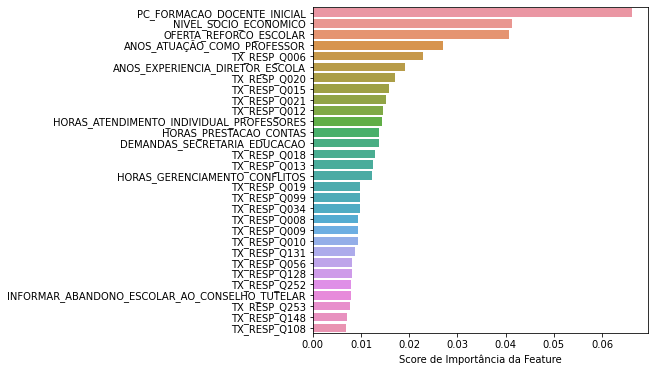

In [ ]:
feature_imp = pd.Series(ml1.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp = feature_imp[0:30]

fig = plt.figure(figsize=(6,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
#plt.ylabel('Features')
#plt.title("Visualizando a Importância de cada Feature")
plt.show()